In [2]:
file=open('cleanedfilecric.csv','r')
filecontents = [i.strip().split('\n') for i in file]
file.close()
filecontents[0]

['text']

In [3]:
filecontents[0]

['text']

In [4]:
from textblob import TextBlob 

In [5]:
wpol = [[i,TextBlob(i[0]).sentiment.polarity] for i in filecontents]
wpol

[[['text'], 0.0],
 [['imvkohli we will miss you indvsnz other matches champion'], -0.125],
 [['out of now where  wow what a shot mithali 6 x98x8dindwvsnzw indvsnz'],
  0.1],
 [['mandhana_smriti such a joy to watch bat indvsnz'], 0.4],
 [['well done mandhana_smriti   another one  india needs you all the time indwvsnzw indvsnz'],
  0.0],
 [['india - 54/2 (17 oversnnindvnz indwvsnzw nzvsind nzvind indvsnz nzwvindw nzvind nzwvsindw'],
  0.0],
 [['not for you indvsnz'], 0.0],
 [['imvkohli has transformed the indian team and now they know how to win overseasnindvsnz indvnz nzvind'],
  0.8],
 [['can we have a match winning first wicket partnership again between mandhana_smriti and jemirodrigues xa6 go gals indvsnz indwvsnzw'],
  0.375],
 [['since pujara didnt walk will harbhajan travel in the same bus as pujara indvsnz pujara ranjitrophy harbhajan_singh'],
  0.0],
 [['im a little late for this but congratulations to imvkohli and team on a very one sided win against nz nodi teamindia cricket i

In [6]:
neg = [i for i,j in wpol if j<0] 
#neu = [i for i,j in wpol if j==0] 
pos = [i for i,j in wpol if j>0] 

In [7]:
sentiments= [len(neg),len(pos)]

In [8]:
import matplotlib.pyplot as plt
labels = 'Negative',' Postive'
fig1, ax1 = plt.subplots()
ax1.pie(sentiments, labels=labels,colors=['r','g'],
        shadow=True, startangle=90)
plt.title=('Sentiment Analysis')
plt.show()

<Figure size 640x480 with 1 Axes>

In [9]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer

In [10]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [11]:
import nltk
nltk.download('stopwords')
from stop_words import get_stop_words
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mukul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
word_tokens = [word_tokenize(i[0][0]) for i in wpol]

In [13]:
filtered_sentence = [w for w in word_tokens if not w in stop_words]

In [14]:
# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]


In [15]:
filtered_sentence1=[]

for i in range(len(filtered_sentence)):
    for j in filtered_sentence[i]:
        filtered_sentence1.append(j)

In [16]:
without_single_chr = [word for word in filtered_sentence1 if len(word) > 2]

In [17]:
# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()] 


In [18]:
cleaned_data_title1 = [cleaned_data_title[i] for i in range(len(cleaned_data_title)) if cleaned_data_title[i] not in ["gully","boy","official","ranveer","speakerpelosi","ranveerofficial","don_gully","mavado","mavado_gully","x98x82","senschumer"]
                       and 'http' not in stop_words 
 and not cleaned_data_title[i].startswith('@')
 and not cleaned_data_title[i].startswith('#')
 and cleaned_data_title[i] != 'RT' and cleaned_data_title[i] not in ["trailer"]
]

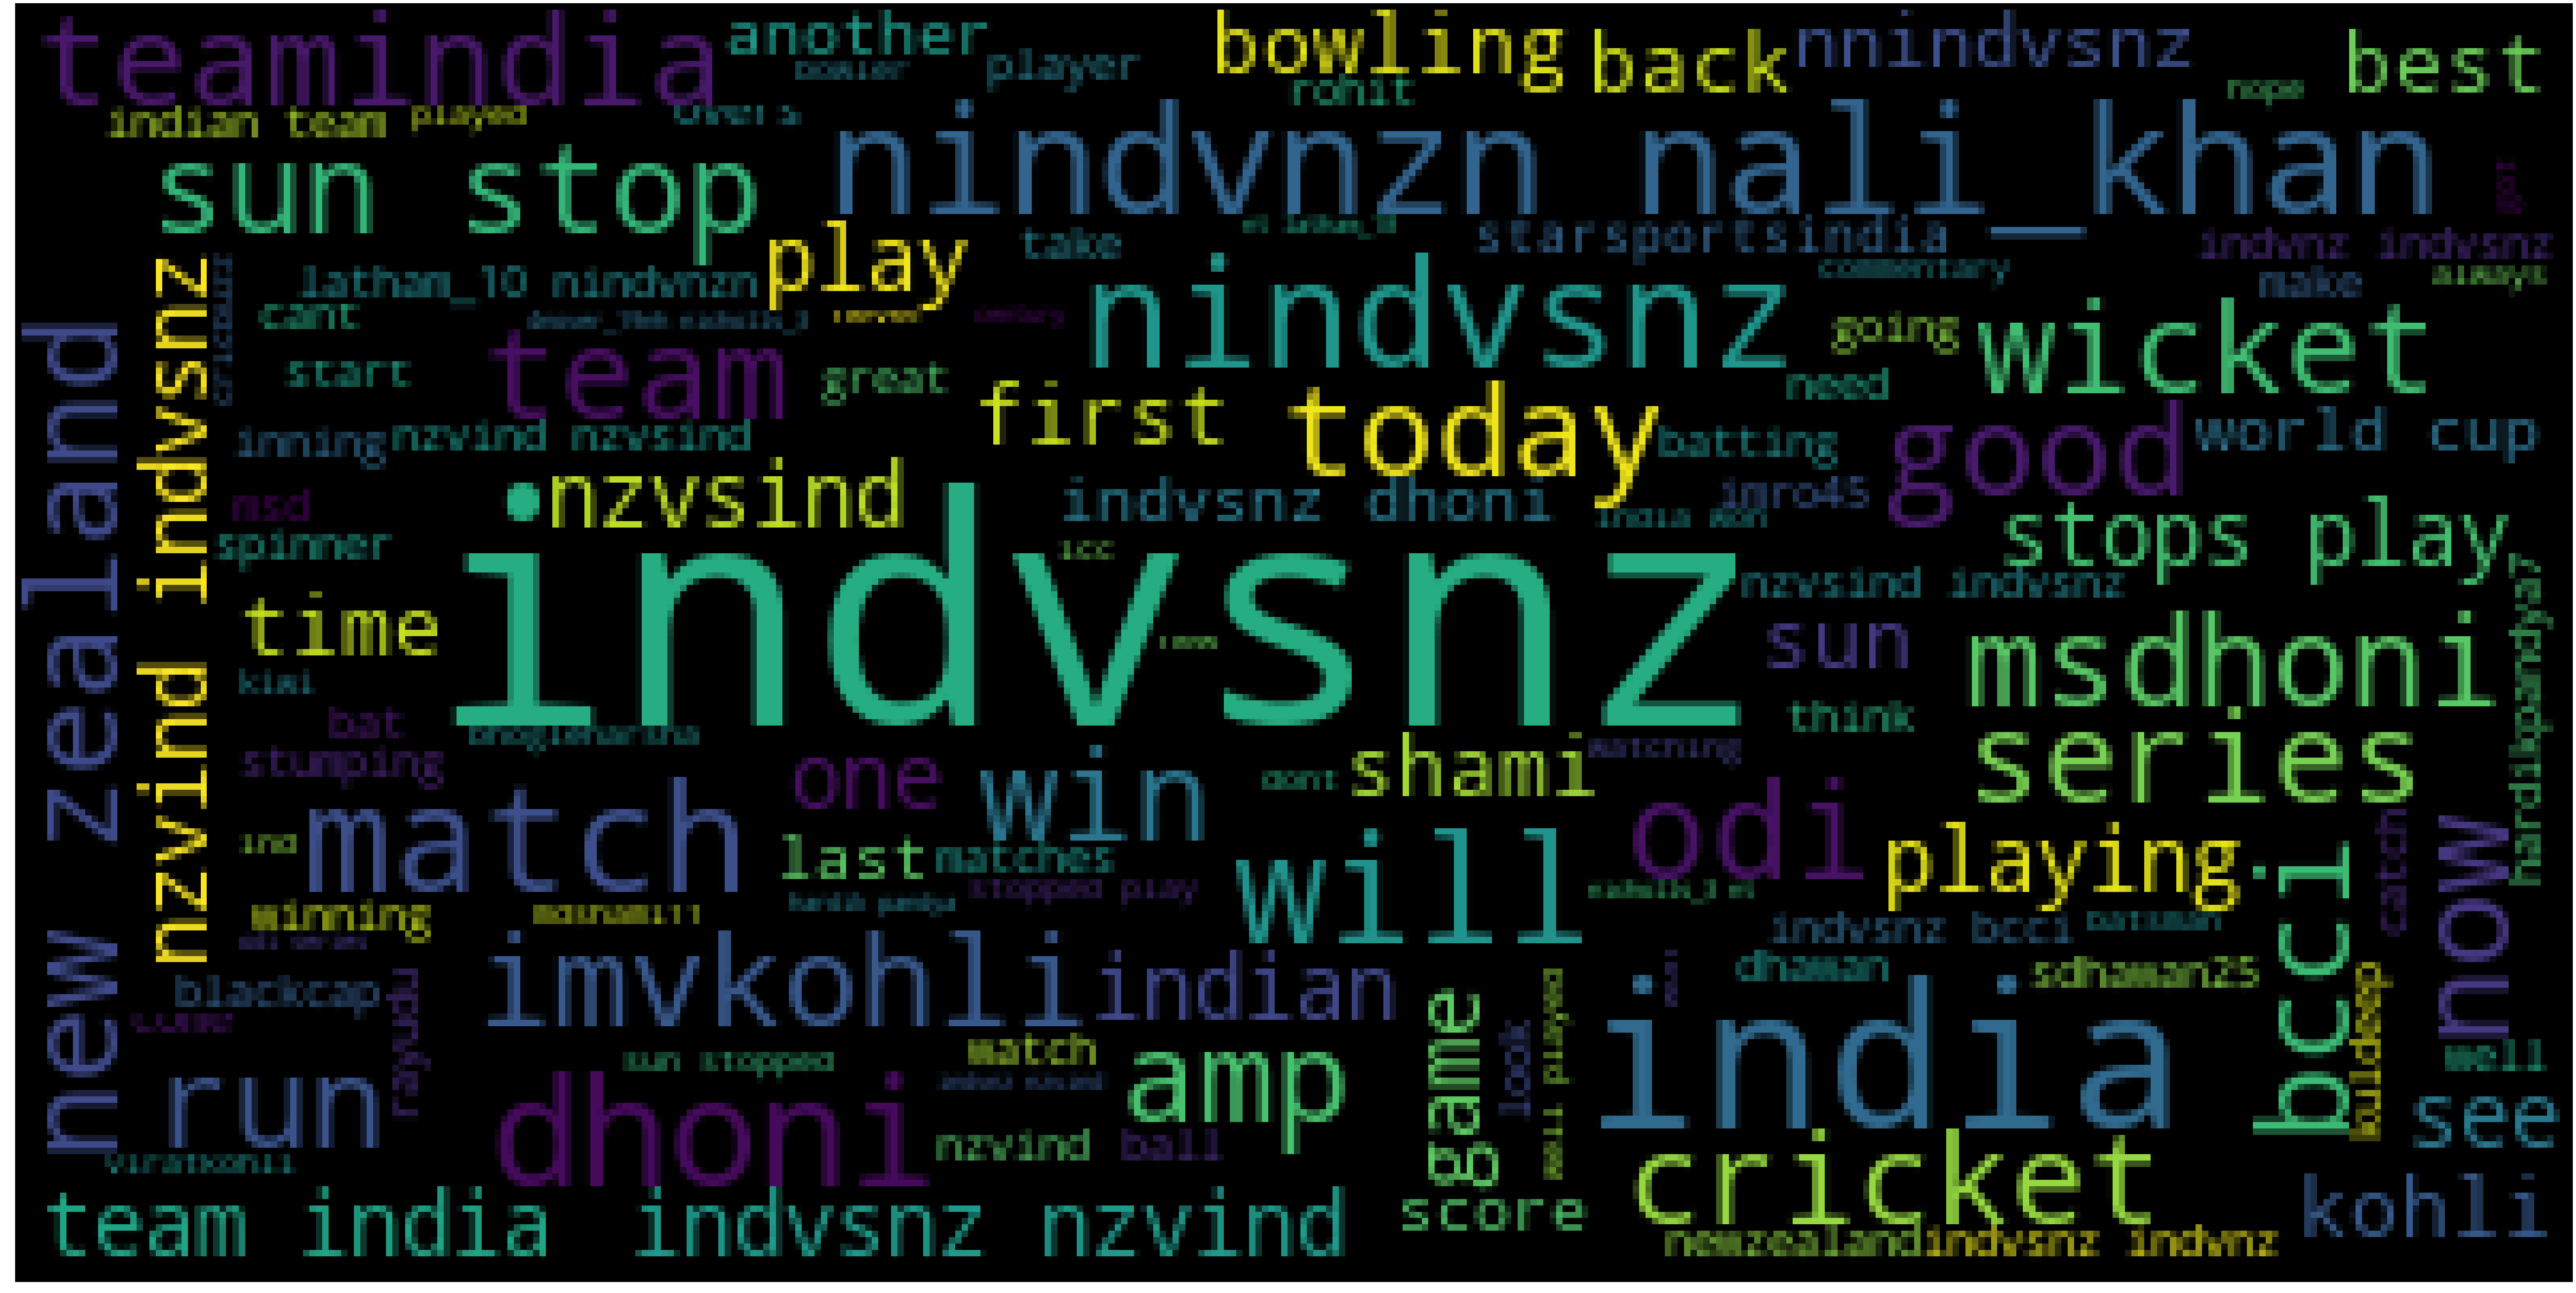

In [19]:
wc(cleaned_data_title1,'black','Common Words' )

In [ ]:
baselist = [[TextBlob(i).sentiment.polarity,i] for i in cleaned_data_title1]

In [ ]:
postive = [j for i,j in baselist if i>0]
negative = [j for i,j in baselist if i<0]

In [ ]:
wc(postive,'white','Common Words' )

In [ ]:
wc(negative,'black','Common Words' )